In [29]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

### Read the input file and check the data dimension

In [2]:
df = pd.read_csv('german_credit.csv')

In [3]:
df.shape

(1000, 21)

In [4]:
df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
X = df.drop('default', axis=1)
y=df['default']

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5, test_size=0.5)

In [7]:
# Lets build a Ensemble model but need to modify the dataset first
X_train.shape

(500, 20)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 34 to 867
Data columns (total 20 columns):
account_check_status          500 non-null object
duration_in_month             500 non-null int64
credit_history                500 non-null object
purpose                       500 non-null object
credit_amount                 500 non-null int64
savings                       500 non-null object
present_emp_since             500 non-null object
installment_as_income_perc    500 non-null int64
personal_status_sex           500 non-null object
other_debtors                 500 non-null object
present_res_since             500 non-null int64
property                      500 non-null object
age                           500 non-null int64
other_installment_plans       500 non-null object
housing                       500 non-null object
credits_this_bank             500 non-null int64
job                           500 non-null object
people_under_maintenance      500 non-null int64
t

In [9]:
X_train = pd.get_dummies(X_train, drop_first=True)

### Check for highly correlated variables but don't required any treatment for this use case

In [10]:
X_train.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
duration_in_month,1.000000,0.654040,0.027427,0.031647,-0.028739,-0.012318,-0.088616,-0.029266,-0.064492,-0.052160,...,0.234867,-0.030418,0.013216,-0.084126,-0.080277,0.015190,-0.078192,-0.153405,0.150134,0.166076
credit_amount,0.654040,1.000000,-0.252611,0.047423,0.072994,0.054255,-0.047328,-0.066205,-0.092983,-0.033688,...,0.308138,-0.047291,0.008403,-0.163430,-0.028719,-0.140484,-0.051385,-0.160887,0.268796,0.089325
installment_as_income_perc,0.027427,-0.252611,1.000000,0.048169,0.043957,-0.045177,-0.088518,0.045556,-0.086008,0.040933,...,0.007294,0.005025,0.079319,0.069805,-0.093490,0.012890,-0.018606,-0.055904,0.033286,0.096767
present_res_since,0.031647,0.047423,0.048169,1.000000,0.268706,0.114518,0.048558,0.120912,-0.103208,-0.008819,...,0.162793,0.004588,-0.014740,-0.304161,0.172441,0.018829,-0.033399,0.010363,0.101722,0.060475
age,-0.028739,0.072994,0.043957,0.268706,1.000000,0.141117,0.105151,0.022848,0.013922,0.052229,...,0.222667,-0.124184,0.022898,-0.024398,-0.169303,-0.135093,0.049706,0.068617,0.147134,0.017185
credits_this_bank,-0.012318,0.054255,-0.045177,0.114518,0.141117,1.000000,0.109156,-0.034471,-0.023522,0.109340,...,0.013517,-0.060803,0.056893,0.026888,-0.054571,0.015328,0.083657,-0.035721,0.065252,0.039526
people_under_maintenance,-0.088616,-0.047328,-0.088518,0.048558,0.105151,0.109156,1.000000,0.010843,-0.006203,0.040149,...,0.070879,-0.036741,0.030672,-0.023277,-0.037070,-0.138984,0.026481,0.200835,-0.076440,-0.141002
account_check_status_< 0 DM,-0.029266,-0.066205,0.045556,0.120912,0.022848,-0.034471,0.010843,1.000000,-0.151134,-0.494076,...,0.054304,-0.099203,0.062473,-0.123139,0.110966,-0.035620,0.050299,0.045541,-0.073330,-0.032805
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.064492,-0.092983,-0.086008,-0.103208,0.013922,-0.023522,-0.006203,-0.151134,1.000000,-0.193931,...,-0.036263,0.014213,0.023947,0.015222,-0.013907,-0.012554,0.032452,-0.009503,0.005220,-0.039063
account_check_status_no checking account,-0.052160,-0.033688,0.040933,-0.008819,0.052229,0.109340,0.040149,-0.494076,-0.193931,1.000000,...,-0.071604,0.093925,-0.032014,0.118471,-0.097720,0.079931,-0.076930,-0.037739,0.040841,-0.025971


### Drop the original variables which are converted to dummy

Already done using drop_first in get dummies

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

Splitting from the 50% dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, random_state = 5, test_size=0.3)

Data has been split from the previous 50% dataset. So now train set has 350 rows and test set has 150 rows

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [12]:
rfcl = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion='entropy', random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

In [13]:
y_preds = rfcl.predict(X_test)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 466 to 372
Data columns (total 48 columns):
duration_in_month                                                             350 non-null int64
credit_amount                                                                 350 non-null int64
installment_as_income_perc                                                    350 non-null int64
present_res_since                                                             350 non-null int64
age                                                                           350 non-null int64
credits_this_bank                                                             350 non-null int64
people_under_maintenance                                                      350 non-null int64
account_check_status_< 0 DM                                                   350 non-null uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       350 non-null uint8
account_check_status

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [15]:
print(rfcl.score(X_test,y_test))
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

0.7733333333333333
[[102   9]
 [ 25  14]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       111
           1       0.61      0.36      0.45        39

   micro avg       0.77      0.77      0.77       150
   macro avg       0.71      0.64      0.65       150
weighted avg       0.75      0.77      0.75       150



### Q6 Show the list of the features importance( 1 Marks)

In [16]:
Features = pd.DataFrame(rfcl.feature_importances_,index = X_train.columns,columns=['Feature_Importance']).sort_values('Feature_Importance',ascending=False)
Features

,Feature_Importance
credit_amount,0.106963
age,0.080059
duration_in_month,0.079784
account_check_status_no checking account,0.063511
installment_as_income_perc,0.041327
present_res_since,0.036494
account_check_status_< 0 DM,0.034352
personal_status_sex_male : single,0.025902
housing_own,0.024957
credits_this_bank,0.023898


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

Using the entire dataset

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
# Use below values
num_folds = 10
seed = 77

In [19]:
df_2 = pd.read_csv('german_credit.csv')

In [20]:
X = df_2.drop('default', axis=1)
y = df_2['default']

In [21]:
X = pd.get_dummies(X, drop_first=True)

In [22]:
y.shape

(1000,)

In [23]:
#Validate the Random Forest model build above using k fold

In [24]:
kf = KFold(n_splits=num_folds, random_state=seed, shuffle=False)

In [25]:
#Calculate Mean score

In [27]:
score = cross_val_score(rfcl, X, y, cv=kf)
print(f"scores of 10 folds:{score}")
print(f"Mean score:{np.mean(score)}")

scores of 10 folds:[0.87 0.67 0.79 0.81 0.81 0.68 0.75 0.78 0.75 0.76]
Mean score:0.767


In [ ]:
# Calculate score standard deviation using std()

In [28]:
print(f"Standard deviation:{score.std()}")

Standard deviation:0.057105166141076934


# Q8 Print the confusion matrix( 1 Marks)

In [30]:
y_pred = cross_val_predict(rfcl, X, y, cv=kf)

In [32]:
confusion_matrix(y,y_pred)

array([[649,  51],
       [182, 118]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [33]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       700
           1       0.70      0.39      0.50       300

   micro avg       0.77      0.77      0.77      1000
   macro avg       0.74      0.66      0.68      1000
weighted avg       0.76      0.77      0.74      1000



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [ ]:
#Hint: Use roc_curve

In [34]:
fpr, tpr, thresholds = roc_curve(y, y_pred)

In [35]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6602380952380953

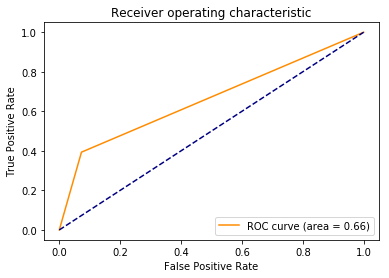

In [36]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [ ]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())